### Image Features and Detection

Image features are distinction patterns of the image that can be used to distinguish the objects in the image or the image themselves. Ideally the features should be invariant and stable under different transformations or lighting so that no matter the viewing angle and lighting the features could be detected. So how do we define these features and how can we detect them?
    Interest points : Points in the image which are invariant to rotation, translation, intensity and scale changes. (Basically, robust and reliable). There are different interest points such as corners, edges, blobs etc.
    Feature Descriptors : These describe the image patch around the interest points in vectors. They can be as simple as raw pixel values or complicated like Histogram of Gradients (HoG) etc.
    
Well-known features are SIFT (Scale Invariant Feature Transform) and SURF (Speeded UP Robust Features) but unfortunately they are patented. License is required for commercial use. One of earliest approach to distinctive features is to use the corner detector such as the Harris corner detector. J. Shi and C. Tomasi made a small modification to it in their paper Good Features to Track which shows better results compared to Harris Corner Detector.

### Harris Corner Detector

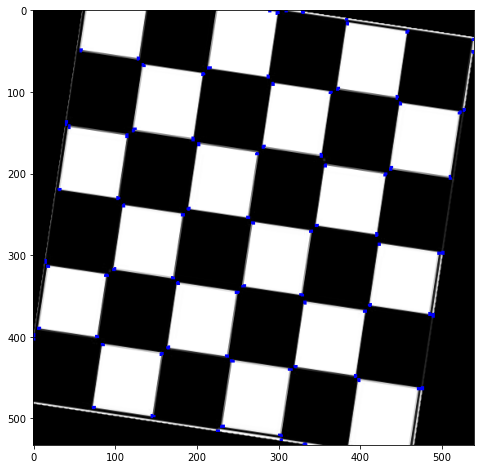

(<matplotlib.image.AxesImage at 0x195211d4278>, None)

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = 'img/chessboard2.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize = (8,8))
plt.imshow(img),plt.show()

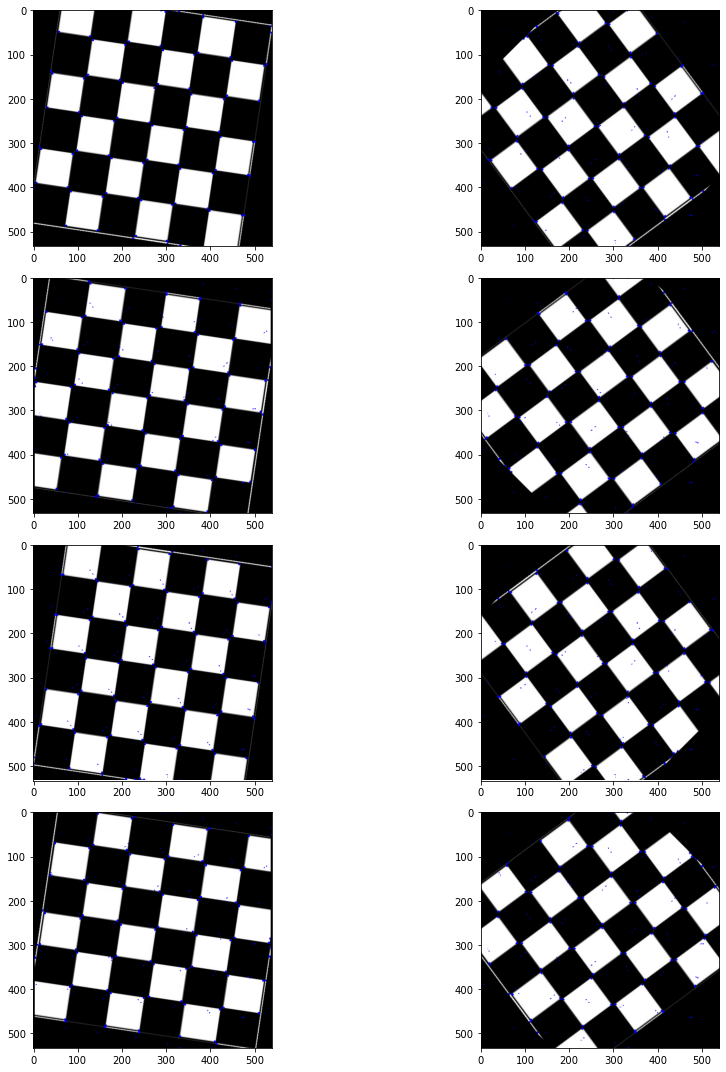

In [4]:
import imutils
p=0
plt.subplots(4,2,figsize=(15,15))
for angle in np.arange(0, 360, 45):
    #print(angle)
    rotated = imutils.rotate(gray, angle)
    dst = cv.cornerHarris(gray,2,3,0.04)
    img2=imutils.rotate(img, angle)
    img2[dst>0.01*dst.max()]=[0,0,255]
    p+=1
    plt.subplot(4, 2, p)
    #plt.figure(figsize = (5,5))
    plt.imshow(img2)
   
plt.tight_layout()
plt.show()


### Shi-Tomasi Corner Detector

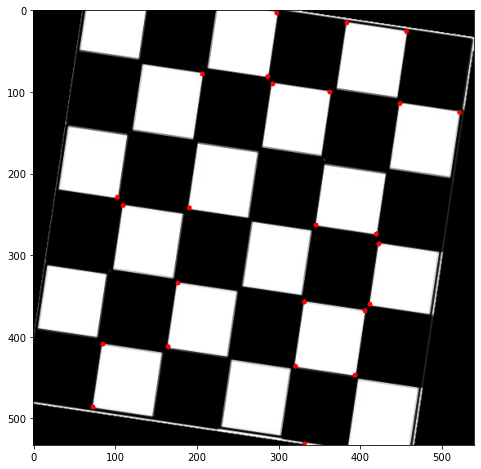

(<matplotlib.image.AxesImage at 0x19521568da0>, None)

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
filename = 'img/chessboard2.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10) # Shi-Tomasi Corner Detector
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
    
plt.figure(figsize = (8,8))
plt.imshow(img),plt.show()

### Question

1. Compare the both detectors using other images. Which is better and why?

### Answer
1.Tomasi Corner Detector is better,because it can better detect corners  

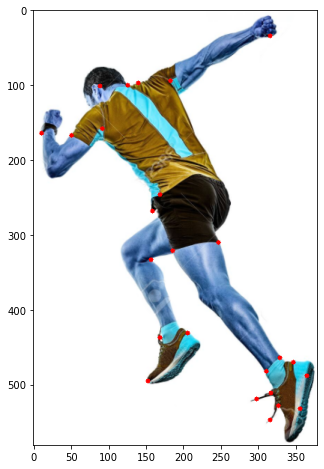

(<matplotlib.image.AxesImage at 0x1952781dda0>, None)

In [26]:
#Tomasi Corner Detector
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
filename = 'img/runner.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10) # Shi-Tomasi Corner Detector
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
    
plt.figure(figsize = (8,8))
plt.imshow(img),plt.show()

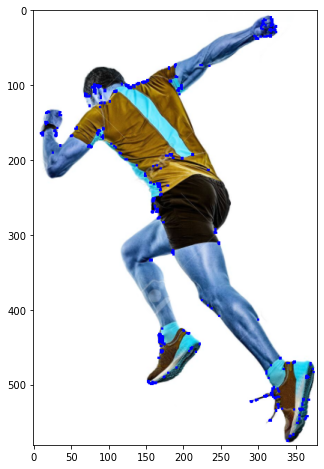

(<matplotlib.image.AxesImage at 0x1952788a3c8>, None)

In [27]:
#Harris Corner Detector

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = 'img/runner.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize = (8,8))
plt.imshow(img),plt.show()

### ORB Interest Points detectors

The SIFT and SURF implementations are no longer included in the OpenCV 3 library by default because these algorithms are patented by their respective creators. So we won't use it. Instead we use a similar feature called ORB. ORB is an efficient alternative to SIFT or SURF.

ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance.


![](img\features.png)

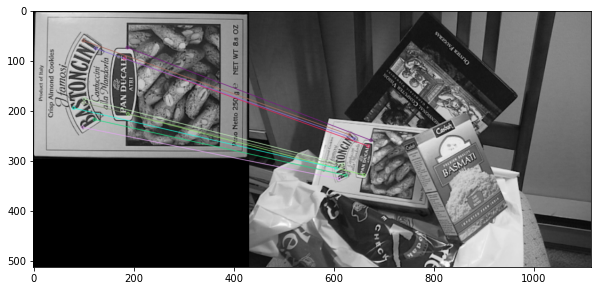

(<matplotlib.image.AxesImage at 0x1952159d780>, None)

In [6]:
#from openCV tutorial

import numpy as np 
import cv2 as cv

import matplotlib.pyplot as plt

img1 = cv.imread('img/box.png',cv.IMREAD_GRAYSCALE) #try basmati.png
img2 = cv.imread('img/scene.png',cv.IMREAD_GRAYSCALE) 

# Initialize the ORB detector algorithm 
orb = cv.ORB_create() 

# Now detect the keypoints and compute the descriptors for the two image 
key1, des1 = orb.detectAndCompute(img1,None) 
key2, des2 = orb.detectAndCompute(img2,None) 

#Next we create a BFMatcher object with distance measurement cv.NORM_HAMMING (since we are using ORB) 
#and crossCheck is switched on for better results. 
#Then we use Matcher.match() method to get the best matches in two images. 
#We sort them in ascending order of their distances so that best matches 
#(with low distance) come to front. Then we draw only first 10 matches  
matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) 
matches = matcher.match(des1,des2) 

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
final_img=cv.drawMatches(img1,key1,img2,key2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (10,10))
plt.imshow(final_img),plt.show()


### Question
1. Test out the ORB detector with other images - such with different orientation, contrast and scale. Are they rotation and scale invariant? What are their other weakness and strength?
1. What can these detectors be used for?
1. Any ideas on how to improve them?


### Answer
1.they are rotation invariant and scale invariant  
2.feature detect  
3.Adjust ORB detector parameters  

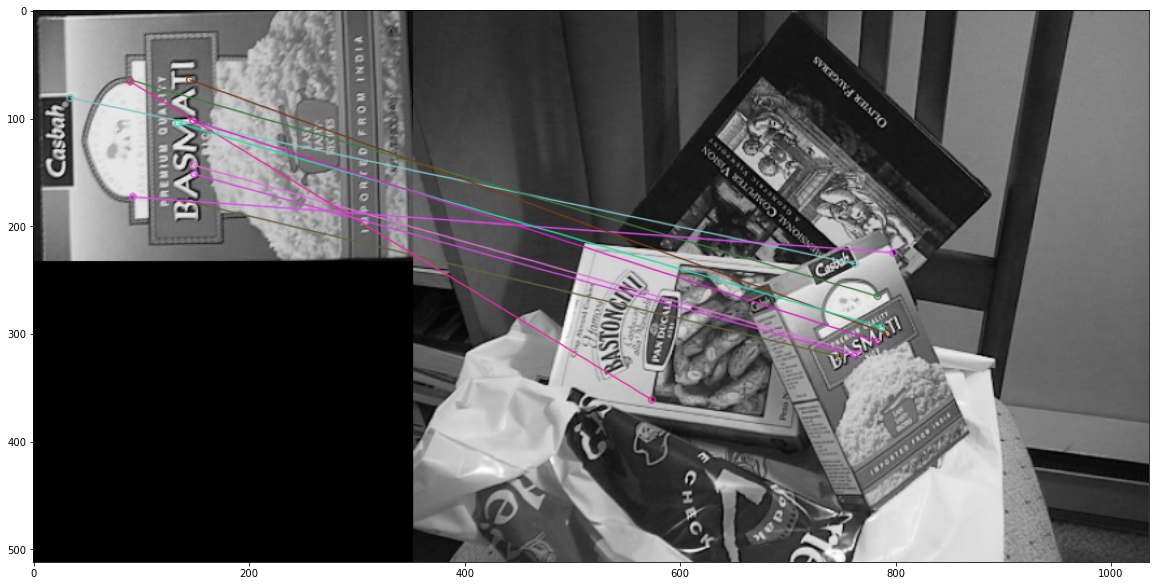

(<matplotlib.image.AxesImage at 0x21ed2927880>, None)

In [6]:
#from openCV tutorial

import numpy as np 
import cv2 as cv

import matplotlib.pyplot as plt

img1 = cv.imread('img/basmati.png',cv.IMREAD_GRAYSCALE) #try basmati.png
img2 = cv.imread('img/scene.png',cv.IMREAD_GRAYSCALE) 

# Initialize the ORB detector algorithm 
orb = cv.ORB_create() 

# Now detect the keypoints and compute the descriptors for the two image 
key1, des1 = orb.detectAndCompute(img1,None) 
key2, des2 = orb.detectAndCompute(img2,None) 

#Next we create a BFMatcher object with distance measurement cv.NORM_HAMMING (since we are using ORB) 
#and crossCheck is switched on for better results. 
#Then we use Matcher.match() method to get the best matches in two images. 
#We sort them in ascending order of their distances so that best matches 
#(with low distance) come to front. Then we draw only first 10 matches  
matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) 
matches = matcher.match(des1,des2) 

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
final_img=cv.drawMatches(img1,key1,img2,key2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,20))
plt.imshow(final_img),plt.show()
